In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/128k-airline-reviews/AirlineReviews.csv


# Analysing Airline Reviews scraped from Airlinequality.com from 2012 to 2023 BY VADER (Sentiment Analysis) and wordcloud.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/kaggle/input/128k-airline-reviews/AirlineReviews.csv')
df.head(3)

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf


In [4]:
df['TripVerified'].value_counts()

Trip Verified                                45440
Not Verified                                 14056
NotVerified                                      9
Trip Verified,Trip Verified                      1
Not Verified,Not Verified                        1
Chicago to Colorado Springs. Not Verified        1
Name: TripVerified, dtype: int64

In [5]:
df.columns

Index(['Aircraft', 'AirlineName', 'CabinType', 'DateFlown', 'DatePub',
       'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OriginCountry', 'OverallScore', 'Recommended', 'Review', 'Route',
       'SeatComfortRating', 'ServiceRating', 'Slug', 'Title', 'TravelType',
       'TripVerified', 'ValueRating', 'WifiRating', 'unique_id'],
      dtype='object')

# EDA Data Preprocessing

In [6]:
df['DateFlown'].isna().sum()

38462

# Making data preprocessing and save it to analyze the data by powerbi

# Data Preprocessing

In [7]:
df1=df.dropna(subset=['DateFlown'])

In [8]:
df1['DateFlown'].isna().sum()

0

# droping unnecessary features

In [9]:
df1.drop(['Aircraft','Route','unique_id','TripVerified','DatePub','Recommended','TravelType','Slug'],axis=1,inplace=True)

In [10]:
df1.dropna(inplace=True)

In [11]:
df1.isna().sum()

AirlineName            0
CabinType              0
DateFlown              0
EntertainmentRating    0
FoodRating             0
GroundServiceRating    0
OriginCountry          0
OverallScore           0
Review                 0
SeatComfortRating      0
ServiceRating          0
Title                  0
ValueRating            0
WifiRating             0
dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90142 entries, 0 to 129204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AirlineName          90142 non-null  object 
 1   CabinType            90142 non-null  object 
 2   DateFlown            90142 non-null  object 
 3   EntertainmentRating  90142 non-null  int64  
 4   FoodRating           90142 non-null  int64  
 5   GroundServiceRating  90142 non-null  int64  
 6   OriginCountry        90142 non-null  object 
 7   OverallScore         90142 non-null  float64
 8   Review               90142 non-null  object 
 9   SeatComfortRating    90142 non-null  int64  
 10  ServiceRating        90142 non-null  int64  
 11  Title                90142 non-null  object 
 12  ValueRating          90142 non-null  int64  
 13  WifiRating           90142 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 10.3+ MB


In [13]:
df1['DateFlown'].head()

0    November 2019
1        June 2019
2        June 2019
6       April 2023
7       April 2019
Name: DateFlown, dtype: object

# Converting DateFlown feature to DateTime

In [14]:
df1['DateFlown']=pd.to_datetime(df1['DateFlown'])

In [15]:
df1['DateFlown'].info()

<class 'pandas.core.series.Series'>
Int64Index: 90142 entries, 0 to 129204
Series name: DateFlown
Non-Null Count  Dtype         
--------------  -----         
90142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


# Replace month names with their corresponding numbers to make time series analysis

In [16]:
df1['DateFlown'] = df1['DateFlown'].replace({'January': '01',
                                           'February': '02',
                                           'March': '03',
                                           'April': '04',
                                           'May': '05',
                                           'June': '06',
                                           'July': '07',
                                           'August': '08',
                                           'September': '09',
                                           'October': '10',
                                           'November': '11',
                                           'December': '12'})


In [17]:
# Print the modified DataFrame
print(df1['DateFlown'])

0        2019-11-01
1        2019-06-01
2        2019-06-01
6        2023-04-01
7        2019-04-01
            ...    
129200   2015-05-01
129201   2015-06-01
129202   2015-04-01
129203   2015-06-01
129204   2015-02-01
Name: DateFlown, Length: 90142, dtype: datetime64[ns]


In [18]:
df1.to_csv('airlines.csv',index=False)

In [19]:
df.drop(['Aircraft','DateFlown','Route','unique_id','TripVerified','DatePub','Recommended','TravelType','Slug'],axis=1,inplace=True)

In [20]:
df.head(3)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating
0,AB Aviation,Economy Class,0,4,4,Netherlands,9.0,Moroni to Moheli. Turned out to be a pretty de...,4,5,pretty decent airline,3,0
1,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Moroni to Anjouan. It is a very small airline....,2,2,Not a good airline,2,0
2,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Anjouan to Dzaoudzi. A very small airline and ...,2,1,flight was fortunately short,2,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AirlineName          129455 non-null  object 
 1   CabinType            126437 non-null  object 
 2   EntertainmentRating  129455 non-null  int64  
 3   FoodRating           129455 non-null  int64  
 4   GroundServiceRating  129455 non-null  int64  
 5   OriginCountry        127777 non-null  object 
 6   OverallScore         125124 non-null  float64
 7   Review               128631 non-null  object 
 8   SeatComfortRating    129455 non-null  int64  
 9   ServiceRating        129455 non-null  int64  
 10  Title                129451 non-null  object 
 11  ValueRating          129455 non-null  int64  
 12  WifiRating           129455 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 12.8+ MB


In [22]:
df.isna().sum()

AirlineName               0
CabinType              3018
EntertainmentRating       0
FoodRating                0
GroundServiceRating       0
OriginCountry          1678
OverallScore           4331
Review                  824
SeatComfortRating         0
ServiceRating             0
Title                     4
ValueRating               0
WifiRating                0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isna().sum()

AirlineName            0
CabinType              0
EntertainmentRating    0
FoodRating             0
GroundServiceRating    0
OriginCountry          0
OverallScore           0
Review                 0
SeatComfortRating      0
ServiceRating          0
Title                  0
ValueRating            0
WifiRating             0
dtype: int64

In [25]:
df.head(3)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating
0,AB Aviation,Economy Class,0,4,4,Netherlands,9.0,Moroni to Moheli. Turned out to be a pretty de...,4,5,pretty decent airline,3,0
1,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Moroni to Anjouan. It is a very small airline....,2,2,Not a good airline,2,0
2,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Anjouan to Dzaoudzi. A very small airline and ...,2,1,flight was fortunately short,2,0


In [26]:
df.iloc[0].Review

"Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time."

# Remove any non-alphanumeric characters by re and stop words and tokenize the review column by NLTK

In [27]:
import re
import nltk
from nltk.corpus import stopwords

# Define a function to preprocess text
def preprocess(text):
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove any digits
    text = re.sub(r'\d+', '', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Recombine the words
    text = ' '.join(tokens)
    return text

# Apply the preprocessing function to the 'Review' column and add a new column for the preprocessed reviews
df['Processed_Review'] = df['Review'].apply(preprocess)

In [28]:
df.head(3)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating,Processed_Review
0,AB Aviation,Economy Class,0,4,4,Netherlands,9.0,Moroni to Moheli. Turned out to be a pretty de...,4,5,pretty decent airline,3,0,moroni moheli turned pretty decent airline onl...
1,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Moroni to Anjouan. It is a very small airline....,2,2,Not a good airline,2,0,moroni anjouan small airline ticket advised tu...
2,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Anjouan to Dzaoudzi. A very small airline and ...,2,1,flight was fortunately short,2,0,anjouan dzaoudzi small airline airline based c...


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122187 entries, 0 to 129454
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AirlineName          122187 non-null  object 
 1   CabinType            122187 non-null  object 
 2   EntertainmentRating  122187 non-null  int64  
 3   FoodRating           122187 non-null  int64  
 4   GroundServiceRating  122187 non-null  int64  
 5   OriginCountry        122187 non-null  object 
 6   OverallScore         122187 non-null  float64
 7   Review               122187 non-null  object 
 8   SeatComfortRating    122187 non-null  int64  
 9   ServiceRating        122187 non-null  int64  
 10  Title                122187 non-null  object 
 11  ValueRating          122187 non-null  int64  
 12  WifiRating           122187 non-null  int64  
 13  Processed_Review     122187 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 14.0+ MB


In [30]:
df.iloc[0].Review

"Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time."

In [31]:
df.iloc[0].Processed_Review

'moroni moheli turned pretty decent airline online booking worked well checkin boarding fine plane looked well maintained short flight minutes didnt expect much still managed hand bottle water biscuits though nice flights time'

In [32]:
import nltk
#download vader from nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#creating an object of sentiment intensity analyzer
sia= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Defining a function to get the polarity scores for a review using VADER and save the results in new columns

In [33]:
def get_polarity(review):
    score = sia.polarity_scores(review)
    return score

# Apply the function to the Processed_Review column
polarity_scores = df['Processed_Review'].apply(get_polarity)

# Create new columns for the positive, neutral, and negative polarity scores
df['Positive'] = polarity_scores.apply(lambda score: score['pos'])
df['Neutral'] = polarity_scores.apply(lambda score: score['neu'])
df['Negative'] = polarity_scores.apply(lambda score: score['neg'])
df['Compound'] = polarity_scores.apply(lambda score: score['compound'])

In [34]:
df.head(3)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating,Processed_Review,Positive,Neutral,Negative,Compound
0,AB Aviation,Economy Class,0,4,4,Netherlands,9.0,Moroni to Moheli. Turned out to be a pretty de...,4,5,pretty decent airline,3,0,moroni moheli turned pretty decent airline onl...,0.360,0.640,0.000,0.9217
1,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Moroni to Anjouan. It is a very small airline....,2,2,Not a good airline,2,0,moroni anjouan small airline ticket advised tu...,0.123,0.753,0.124,-0.0258
2,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Anjouan to Dzaoudzi. A very small airline and ...,2,1,flight was fortunately short,2,0,anjouan dzaoudzi small airline airline based c...,0.203,0.797,0.000,0.8122


In [35]:
# determine the positive and negative polarity depending on compound score
df['Polarity']=''
df.loc[df.Compound>0,'Polarity']='POS'
df.loc[df.Compound<0,'Polarity']='NEG'
df.loc[df.Compound==0,'Polarity']='NEU'
df.head(3)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating,Processed_Review,Positive,Neutral,Negative,Compound,Polarity
0,AB Aviation,Economy Class,0,4,4,Netherlands,9.0,Moroni to Moheli. Turned out to be a pretty de...,4,5,pretty decent airline,3,0,moroni moheli turned pretty decent airline onl...,0.360,0.640,0.000,0.9217,POS
1,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Moroni to Anjouan. It is a very small airline....,2,2,Not a good airline,2,0,moroni anjouan small airline ticket advised tu...,0.123,0.753,0.124,-0.0258,NEG
2,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Anjouan to Dzaoudzi. A very small airline and ...,2,1,flight was fortunately short,2,0,anjouan dzaoudzi small airline airline based c...,0.203,0.797,0.000,0.8122,POS


# Count the number of positive , neutral and negative reviews

In [36]:
pos = 0
neu = 0
neg = 0
for i, row in df.iterrows():
    if row['Polarity'] == "POS":
        pos += 1
    elif row['Polarity'] == "NEU": 
        neu += 1
    else:
        neg += 1

# Print the results
print(f"Positive reviews: {pos}")
print(f"neutral reviews: {neu}")
print(f"Negative reviews: {neg}")

Positive reviews: 73872
neutral reviews: 735
Negative reviews: 47580


In [37]:
df.drop(['Positive','Negative','Neutral'],axis=1,inplace=True)

In [38]:
df.head(1)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating,Processed_Review,Compound,Polarity
0,AB Aviation,Economy Class,0,4,4,Netherlands,9.0,Moroni to Moheli. Turned out to be a pretty de...,4,5,pretty decent airline,3,0,moroni moheli turned pretty decent airline onl...,0.9217,POS


# Group the DataFrame by the 'AirlineName' column and count the number of positive and negative reviews for each AirlineName

In [39]:
airline_polarity= df.groupby(['AirlineName','Polarity'])['Polarity'].count()
airline_polarity

AirlineName             Polarity
AB Aviation             NEG           1
                        POS           2
ANA All Nippon Airways  NEG          45
                        POS         502
ASKY Airlines           NEG          16
                                   ... 
flybe                   NEG           2
                        POS           2
flydubai                NEG         197
                        NEU           4
                        POS         162
Name: Polarity, Length: 1176, dtype: int64

# Polarity Distribution for each Airline

In [40]:
import plotly.express as px

# Count the number of reviews for each sentiment and airline
airline_polarity = df.groupby(['AirlineName', 'Polarity'])['Polarity'].count()

# Reshape the data to create a DataFrame with the counts for each airline and sentiment
airline_polarity_df = airline_polarity.unstack()

# Convert the DataFrame to a long format
airline_polarity_df = airline_polarity_df.reset_index().melt(id_vars='AirlineName', var_name='Polarity', value_name='Number of Reviews')

# Create the stacked bar chart using Plotly
fig = px.bar(airline_polarity_df, x='AirlineName', y='Number of Reviews', color='Polarity', barmode='stack')

# Add labels and a title to the chart
fig.update_layout(title='Polarity Distribution by Airline', xaxis_title='Airline', yaxis_title='Number of Reviews')

# Show the chart
fig.show()

# Calculate the mean OverallScore for each airline

In [41]:
airline_scores = df.groupby('AirlineName')['OverallScore'].mean().reset_index()
airline_scores

,AirlineName,OverallScore
0,AB Aviation,3.666667
1,ANA All Nippon Airways,7.853748
2,ASKY Airlines,2.857143
3,ATA Airlines,1.500000
4,Adria Airways,5.885714
...,...,...
539,euroAtlantic Airways,2.133333
540,fastjet,3.696970
541,flyadeal,1.894737
542,flybe,5.750000


# Mean Overall Score for each Airline

In [42]:
# Create the bar chart using Plotly
fig = px.bar(airline_scores, x='AirlineName', y='OverallScore', labels={'OverallScore': 'Mean Overall Score'})

# Add a title to the chart
fig.update_layout(title='Mean Overall Score by Airline')

# Show the chart
fig.show()

# Get the total ratings for all services except wifi rating and entertainment rating because the most values is missing to can sorting airlines from better to worse

In [43]:
df['TotalRatings'] = df['SeatComfortRating'] + df['ValueRating'] + df['ServiceRating'] + df['FoodRating'] + df['GroundServiceRating'] 
df.head()

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating,Processed_Review,Compound,Polarity,TotalRatings
0,AB Aviation,Economy Class,0,4,4,Netherlands,9.0,Moroni to Moheli. Turned out to be a pretty de...,4,5,pretty decent airline,3,0,moroni moheli turned pretty decent airline onl...,0.9217,POS,20
1,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Moroni to Anjouan. It is a very small airline....,2,2,Not a good airline,2,0,moroni anjouan small airline ticket advised tu...,-0.0258,NEG,8
2,AB Aviation,Economy Class,0,1,1,UnitedKingdom,1.0,Anjouan to Dzaoudzi. A very small airline and ...,2,1,flight was fortunately short,2,0,anjouan dzaoudzi small airline airline based c...,0.8122,POS,7
3,Aerocaribbean,Economy Class,0,0,0,Denmark,8.0,Havana - Cayo Coco return. A one hour flight w...,0,0,Aerocaribbean customer review,4,0,havana cayo coco return one hour flight old at...,0.7609,POS,4
6,AeroItalia,Economy Class,0,1,1,Italy,2.0,Only 1 check-in desk open for a full plane and...,1,3,impossible to check in online,1,0,checkin desk open full plane impossible check ...,-0.6582,NEG,7


# Top 10 rated airlines in the world based on passengers reviews on airquality.com 

In [44]:
airline_ratings = df.groupby('AirlineName')['OverallScore','EntertainmentRating', 'SeatComfortRating', 'ValueRating', 'ServiceRating', 'FoodRating', 'GroundServiceRating', 'WifiRating','TotalRatings'].mean().reset_index().sort_values(by=['TotalRatings'], ascending=False)
airline_ratings.head(10)

,AirlineName,OverallScore,EntertainmentRating,SeatComfortRating,ValueRating,ServiceRating,FoodRating,GroundServiceRating,WifiRating,TotalRatings
298,Lubeck Air,10.0,0.0,5.0,5.0,5.0,5.0,5.0,0.0,25.0
266,JetsuiteX,10.0,0.0,5.0,5.0,5.0,5.0,5.0,0.0,25.0
223,Grand Cru Airlines,10.0,0.0,5.0,5.0,5.0,5.0,5.0,0.0,25.0
440,StarFlyer,10.0,4.0,5.0,5.0,5.0,4.5,5.0,2.5,24.5
442,Sun-Air,10.0,1.5,4.5,5.0,5.0,5.0,5.0,0.0,24.5
63,Air Rarotonga,10.0,0.0,5.0,4.5,5.0,4.5,5.0,0.0,24.0
385,Rhein-Neckar Air,10.0,0.0,4.0,5.0,5.0,5.0,5.0,0.0,24.0
465,TUS Airways,9.5,0.0,4.5,5.0,5.0,4.0,5.0,0.0,23.5
307,Madagasikara Airways,10.0,0.0,3.5,5.0,5.0,5.0,5.0,0.0,23.5
201,FMI Air,10.0,0.0,3.5,4.5,5.0,4.5,5.0,0.0,22.5


# Taking Emirates Airline data as an example to making sentiment analysis and wordcloud for reviews 

In [45]:
emirates_airline=df[df['AirlineName'] == 'Emirates']
emirates_airline.head(3)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating,Processed_Review,Compound,Polarity,TotalRatings
42230,Emirates,Economy Class,0,0,1,India,5.0,My wife travelled on 6th may to Cochin to Auck...,1,0,they weighed even laptop bag,3,0,wife travelled th may cochin auckland via duba...,0.4404,POS,5
42231,Emirates,Economy Class,4,3,1,India,3.0,Emirates has been the worst airline to deal wi...,4,4,"worst airline to deal with""",1,0,emirates worst airline deal terms customer ser...,-0.8402,NEG,13
42232,Emirates,Economy Class,5,1,5,UnitedKingdom,4.0,Very disappointed when I approached the stewar...,5,2,"Very disappointed""",1,0,disappointed approached stewardess talking lau...,0.4404,POS,14


In [46]:
emirates_airline.shape

(2243, 17)

# Sentiment Distribution and counts for Emirates Airline

In [47]:
emirates_airline_polarity = emirates_airline.groupby('Polarity')['Polarity'].count()
emirates_airline_polarity

Polarity
NEG     668
NEU      16
POS    1559
Name: Polarity, dtype: int64

In [48]:
# Create the pie chart using Plotly
fig = px.pie(emirates_airline_polarity, values='Polarity', names=emirates_airline_polarity.index)

# Add a title to the chart
fig.update_layout(title='Sentiment Distribution for Emirates Airline')

# Show the chart
fig.show()

**the result show that 70% from passengers reviews are positive**

# get the overallscore and total ratings mean

In [49]:
emirates_airline.groupby('AirlineName')['OverallScore','TotalRatings'].mean().reset_index()

,AirlineName,OverallScore,TotalRatings
0,Emirates,5.409273,14.627285


***Overall score 0-10 and Total ratings 0-25 ***

# Visualize the ratings mean

In [66]:
emirates_airline_ratings = emirates_airline.groupby('AirlineName')['EntertainmentRating','SeatComfortRating','ValueRating','ServiceRating','FoodRating','GroundServiceRating','WifiRating'].mean().reset_index()
emirates_airline_ratings

,AirlineName,EntertainmentRating,SeatComfortRating,ValueRating,ServiceRating,FoodRating,GroundServiceRating,WifiRating
0,Emirates,3.671422,3.312082,3.137762,3.034329,3.019171,2.123941,1.275524


In [67]:
# Convert the DataFrame to a long format
emirates_airline_ratings = emirates_airline_ratings.melt(id_vars='AirlineName', var_name='Category', value_name='Mean Rating')

# Create the horizontal bar chart using Plotly
fig = px.bar(emirates_airline_ratings, x='Mean Rating', y='Category', orientation='h', color='Category')

# Add a title and axis labels to the chart
fig.update_layout(title='Mean Ratings by Category for Emirates Airline', xaxis_title='Mean Rating', yaxis_title='Category')

# Show the chart
fig.show()

**the best service for emirates airline is entertainment service and the worst one is wifi service and they need to improve the ground service**

In [52]:
emirates_airline['CabinType'].value_counts()

Economy Class      1576
Business Class      574
First Class          86
Premium Economy       7
Name: CabinType, dtype: int64

**the most reviews is from economy class**

# Sentiment Distribution by Cabin Type

In [53]:
cabintype_polarity = emirates_airline.groupby(['CabinType','Polarity'])['Polarity'].count()
cabintype_polarity

CabinType        Polarity
Business Class   NEG          114
                 NEU            1
                 POS          459
Economy Class    NEG          538
                 NEU           14
                 POS         1024
First Class      NEG           13
                 NEU            1
                 POS           72
Premium Economy  NEG            3
                 POS            4
Name: Polarity, dtype: int64

In [54]:
# Calculate the count and percentage of each sentiment for each cabin type
cabintype_polarity_count = emirates_airline.groupby(['CabinType', 'Polarity'])['Polarity'].count()
cabintype_polarity_pct = cabintype_polarity_count/emirates_airline.groupby(['CabinType'])['Polarity'].count() * 100

# Create a DataFrame with the count and percentage values
cabintype_polarity = pd.concat([cabintype_polarity_count, cabintype_polarity_pct], axis=1)
cabintype_polarity.columns = ['Count', 'Percentage']
cabintype_polarity = cabintype_polarity.reset_index()

# Format the percentage values as text labels
cabintype_polarity['Percentage_Text'] = cabintype_polarity['Percentage'].apply(lambda x: '{:.2f}%'.format(x))

# Create a new column with both count and percentage
cabintype_polarity['Count_Percentage'] = cabintype_polarity.apply(lambda row: f"{row['Count']} ({row['Percentage_Text']})", axis=1)

# Create the stacked bar chart using Plotly
fig = px.bar(cabintype_polarity, x='CabinType', y='Count', color='Polarity', barmode='stack',
             text='Count_Percentage', template='simple_white')

# Add a title to the chart
fig.update_layout(title='Sentiment Distribution by Cabin Type')

# Show the chart
fig.show()

# The results show that the most bad reviews are from economy class.                     the most good reviews are from business class.

In [55]:
economy=emirates_airline[emirates_airline['CabinType']=='Economy Class']
economy.head(3)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating,Processed_Review,Compound,Polarity,TotalRatings
42230,Emirates,Economy Class,0,0,1,India,5.0,My wife travelled on 6th may to Cochin to Auck...,1,0,they weighed even laptop bag,3,0,wife travelled th may cochin auckland via duba...,0.4404,POS,5
42231,Emirates,Economy Class,4,3,1,India,3.0,Emirates has been the worst airline to deal wi...,4,4,"worst airline to deal with""",1,0,emirates worst airline deal terms customer ser...,-0.8402,NEG,13
42232,Emirates,Economy Class,5,1,5,UnitedKingdom,4.0,Very disappointed when I approached the stewar...,5,2,"Very disappointed""",1,0,disappointed approached stewardess talking lau...,0.4404,POS,14


In [56]:
economy.shape

(1576, 17)

# Mean Ratings by Category for Economy Class

In [68]:
economy_mean_ratings = economy.groupby('AirlineName')['EntertainmentRating','SeatComfortRating','ValueRating','ServiceRating', 'FoodRating','GroundServiceRating','WifiRating'].mean().reset_index()
economy_mean_ratings

,AirlineName,EntertainmentRating,SeatComfortRating,ValueRating,ServiceRating,FoodRating,GroundServiceRating,WifiRating
0,Emirates,3.511421,3.07868,3.000635,2.813452,2.850888,1.996827,1.194797


In [69]:
# Convert the DataFrame to a long format
economy_mean_ratings = economy_mean_ratings.melt(id_vars='AirlineName', var_name='Category', value_name='Mean Rating')

# Create the horizontal bar chart using Plotly
fig = px.bar(economy_mean_ratings, x='Mean Rating', y='Category', orientation='h', color='Category')

# Add a title and axis labels to the chart
fig.update_layout(title='Mean Ratings by Category for Economy Class', xaxis_title='Mean Rating', yaxis_title='Category')

# Show the chart
fig.show()

# The results show that the most bad reviews are from economy class and from groundservice rating and wifi rating. the most good reviews are from business class and from entertainment and seat comfort rating.

In [59]:
economy.groupby('AirlineName')['OverallScore'].mean().reset_index()

,AirlineName,OverallScore
0,Emirates,4.95368


In [60]:
emirates_airline.head(3)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating,Processed_Review,Compound,Polarity,TotalRatings
42230,Emirates,Economy Class,0,0,1,India,5.0,My wife travelled on 6th may to Cochin to Auck...,1,0,they weighed even laptop bag,3,0,wife travelled th may cochin auckland via duba...,0.4404,POS,5
42231,Emirates,Economy Class,4,3,1,India,3.0,Emirates has been the worst airline to deal wi...,4,4,"worst airline to deal with""",1,0,emirates worst airline deal terms customer ser...,-0.8402,NEG,13
42232,Emirates,Economy Class,5,1,5,UnitedKingdom,4.0,Very disappointed when I approached the stewar...,5,2,"Very disappointed""",1,0,disappointed approached stewardess talking lau...,0.4404,POS,14


# Generate the word cloud for positive opinions

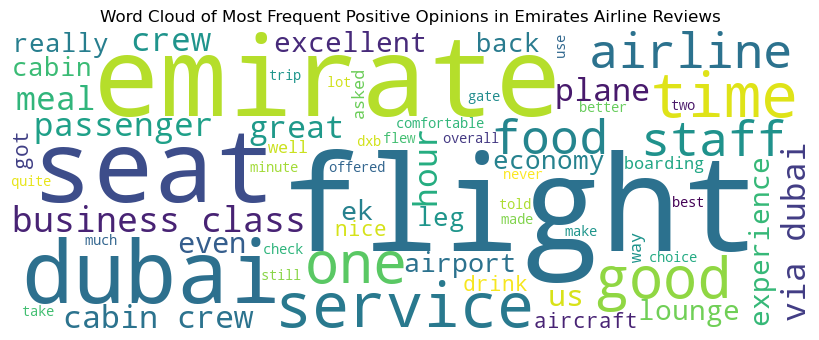

In [61]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate the positive and negative reviews
positive_reviews = emirates_airline[emirates_airline['Compound'] > 0]
negative_reviews = emirates_airline[emirates_airline['Compound'] < 0]

# Extract the most frequent positive and negative opinions
positive_opinions = ' '.join(positive_reviews['Processed_Review'])
negative_opinions = ' '.join(negative_reviews['Processed_Review'])

# Generate the word cloud for positive opinions
wordcloud = WordCloud(width=800, height=300, background_color='white', min_font_size=10).generate(positive_opinions)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud of Most Frequent Positive Opinions in Emirates Airline Reviews')
plt.show()


# Generate the word cloud for negative opinions

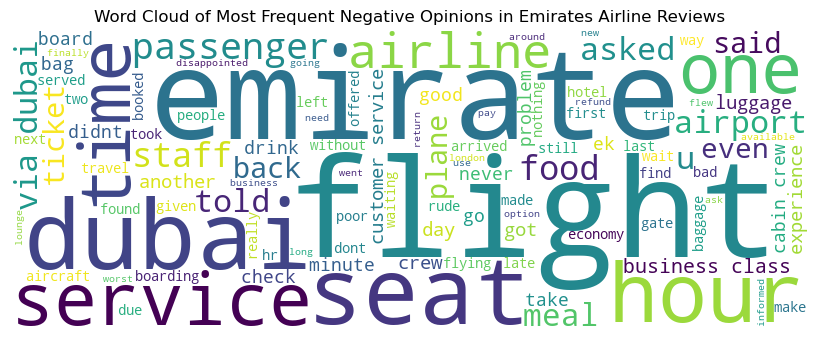

In [62]:
# Generate the word cloud for negative opinions
wordcloud = WordCloud(width=800, height=300, background_color='white', min_font_size=10).generate(negative_opinions)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud of Most Frequent Negative Opinions in Emirates Airline Reviews')
plt.show()

# you can make analysis on any airline comapnies in the data